In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2

import pickle as pkl
import os, sys
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chi2

#Change the resolution of the plots
plt.rcParams['figure.dpi']= 200


In [2]:
channels = ["WW","bb","tautau","mumu","nuenue","numunumu","nutaunutau"]
ch_title = {"WW":r"$W^+ W^-$","bb":r"$b\bar{b}$","tautau":r"$\tau \bar{\tau}$", "mumu":r"$\mu^+\mu^-$","nuenue":r"$\nu_e \bar{\nu}_e$","numunumu":r'$\nu_\mu \bar{\nu}_\mu$',"nutaunutau":r"$\nu_\tau \bar{\nu}_\tau$"}
cols = {"WW":"purple","bb":"darkturquoise","tautau":'dodgerblue', "mumu":"green","nuenue":"hotpink","numunumu":'deeppink',"nutaunutau":"pink"}

filepath = '/data/user/tchau/DarkMatter_OscNext/Sensitivity/UpperLimit/'
# filepath = '/data/user/tchau/DarkMatter_OscNext/Sensitivity/backup/UpperLimit/'
file = os.listdir(filepath)

ann_WW_NFW_30points_MC1122_BKGfulldata_nsample1000_gcinjNone_gcmodelNone_fixgc1.pkl
ann_bb_NFW_30points_MC1122_BKGfulldata_nsample1000_gcinjNone_gcmodelNone_fixgc1.pkl
ann_tautau_NFW_30points_MC1122_BKGfulldata_nsample1000_gcinjNone_gcmodelNone_fixgc1.pkl
ann_mumu_NFW_30points_MC1122_BKGfulldata_nsample1000_gcinjNone_gcmodelNone_fixgc1.pkl
ann_nuenue_NFW_30points_MC1122_BKGfulldata_nsample1000_gcinjNone_gcmodelNone_fixgc1.pkl
ann_numunumu_NFW_30points_MC1122_BKGfulldata_nsample1000_gcinjNone_gcmodelNone_fixgc1.pkl
ann_nutaunutau_NFW_30points_MC1122_BKGfulldata_nsample1000_gcinjNone_gcmodelNone_fixgc1.pkl


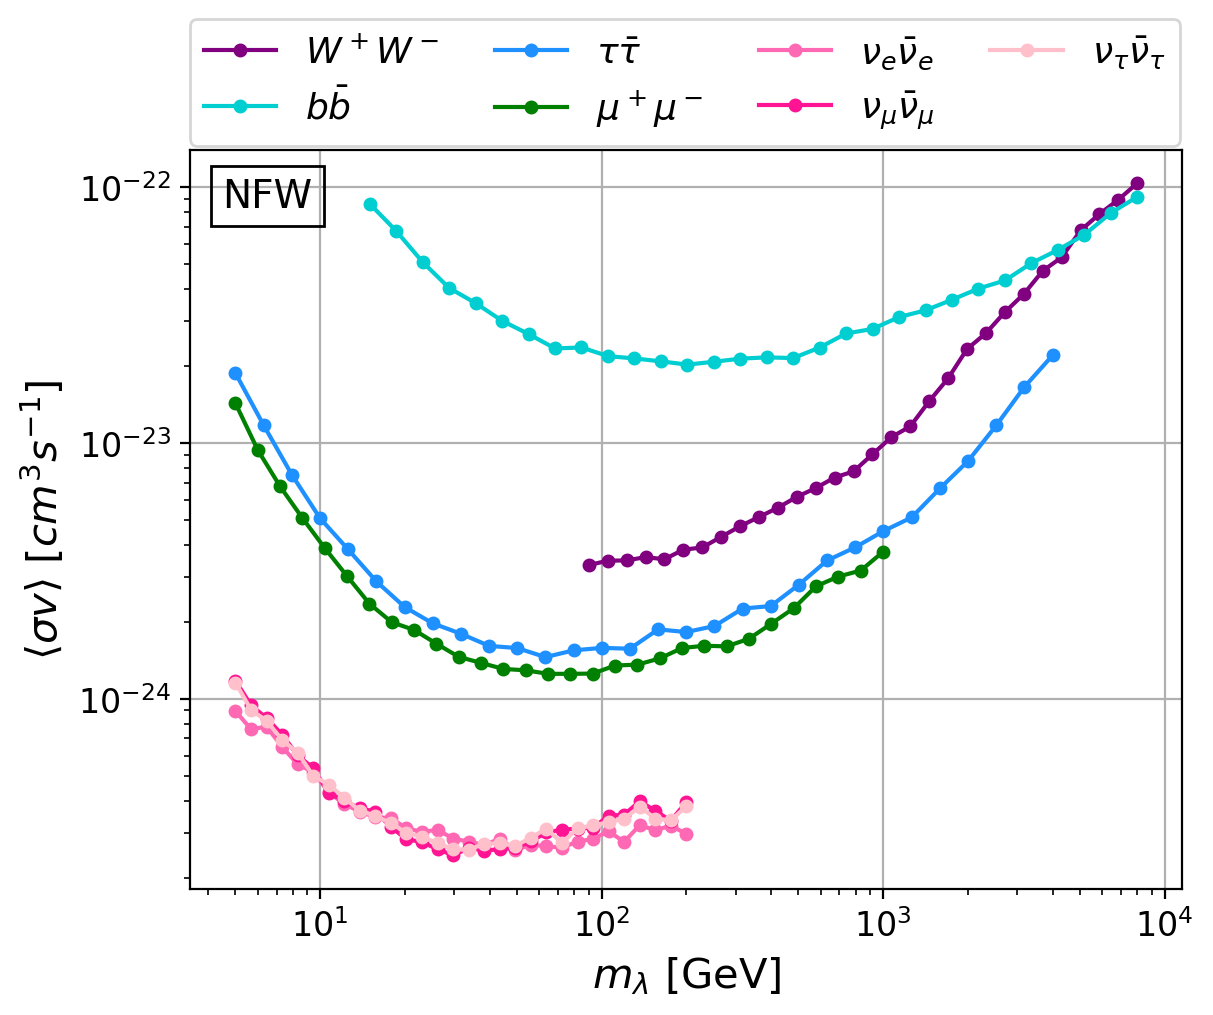

In [3]:
profile = 'NFW' # NFW, Burkert
process = 'ann' # ann, decay
for ch in channels:
    path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and 'MC1122_BKGfulldata_nsample1000_gcinjNone_gcmodelNone_fixgc1.pkl' in file[i] and '30points' in file[i])]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    # limit =  UL['UL']
    limit =  UL['median']
    # limit =  UL['fraction']

    # plt.fill_between(UL['mass'], UL['2.5'], UL['97.5'], alpha=.15, color='green')
    # plt.fill_between(UL['mass'], UL['16'], UL['84'], alpha=.1, color='green')

    plt.plot(UL['mass'], limit, marker='o',label=ch_title[ch], color=cols[ch], markersize=4) 




plt.semilogy()
plt.semilogx()

# plt.ylim(1e-25, 9e-22)
# plt.ylim(1e22, 6e26)


plt.legend(ncol=4, bbox_to_anchor=(-0.019, 1.1, 1.035, 0.101), loc='upper left', mode="expand", fontsize=13)

if process=='ann':  plt.ylabel(r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$', fontsize=15)
if process=='decay': plt.ylabel(r'$\tau$'+r' $[s]$', fontsize=15)
# plt.ylabel(r'$\xi_{ann}$')
# plt.ylabel(r'$N_{signal}$')


plt.xlabel(r'$m_{\lambda}$'+' [GeV]', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.15,0.82, profile, bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.grid()

ann_WW_NFW_30points_MC1122_BKGfulldata_nsample1000_gcinjNone_gcmodelNone_fixgc1_testBkgnokde.pkl
ann_WW_NFW_30points_MC1122_unblind_gcmodelNone_fixgc1.pkl
ann_WW_NFW_30points_MC1122_unblind_gcmodelNone_fixgc1_testBkgnokde.pkl


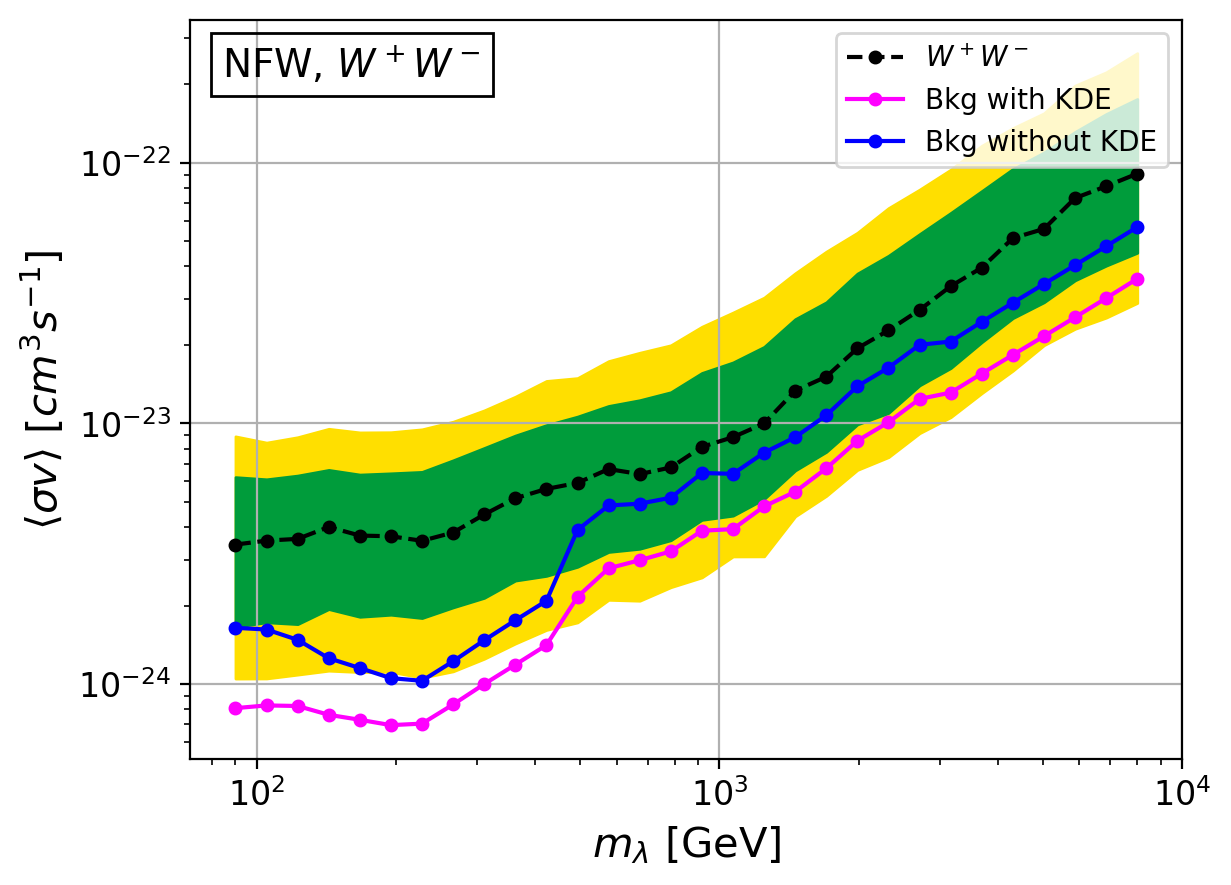

In [9]:
profile = 'NFW' # NFW, Burkert
process = 'ann' # ann, decay
for ch in ['WW']:
    path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and 'MC1122_BKGfulldata_nsample' in file[i] and 'fixgc1_testBkgnokde.pkl' in file[i])]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    # limit =  UL['UL']
    limit =  UL['median']
    # limit =  UL['fraction']
    plt.fill_between(UL['mass'], UL['16'], UL['84'], alpha=1., color='#FFDF00')
    plt.fill_between(UL['mass'], UL['2.5'], UL['97.5'], alpha=1., color='#009C3B')
    plt.plot(UL['mass'], limit, marker='o',label=ch_title[ch], color='black', markersize=4, ls='--') 


    path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and '30points_MC1122_unblind_gcmodelNone_fixgc1.pkl' in file[i] )]
    # path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and '30points_MC1122_unblind_gcmodelNone_fixgc1_testBkgnokde.pkl' in file[i] )]

    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    limit =  UL['UL']
    plt.plot(UL['mass'], limit, marker='o', color='magenta', markersize=4, label='Bkg with KDE') 

    # path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and '30points_MC1122_unblind_gcmodelNone_fixgc1.pkl' in file[i] )]
    path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and '30points_MC1122_unblind_gcmodelNone_fixgc1_testBkgnokde.pkl' in file[i] )]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    limit =  UL['UL']
    plt.plot(UL['mass'], limit, marker='o', color='blue', markersize=4, label='Bkg without KDE') 

plt.semilogy()
plt.semilogx()

# plt.ylim(1e-25, 1e-21)
# plt.ylim(1e22, 6e26)


# plt.legend(ncol=4, bbox_to_anchor=(-0.019, 1.1, 1.035, 0.101), loc='upper left', mode="expand", fontsize=13)

if process=='ann':  plt.ylabel(r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$', fontsize=15)
if process=='decay': plt.ylabel(r'$\tau$'+r' $[s]$', fontsize=15)
# plt.ylabel(r'$\xi_{ann}$')
# plt.ylabel(r'$N_{signal}$')

plt.legend(loc='upper right')

plt.xlabel(r'$m_{\lambda}$'+' [GeV]', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.15,0.82, f'{profile}, {ch_title[ch]}', bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.grid()

ann_WW_NFW_30points_MC1122_BKGfulldata_nsample500_gcinjNone_gcmodelNone_fixgc1_testnullasRAscrambling.pkl
ann_WW_NFW_30points_MC1122_unblind_gcmodelNone_fixgc1_testBkgnokde.pkl
ann_WW_NFW_30points_MC1122_unblind_gcmodelNone_fixgc1.pkl


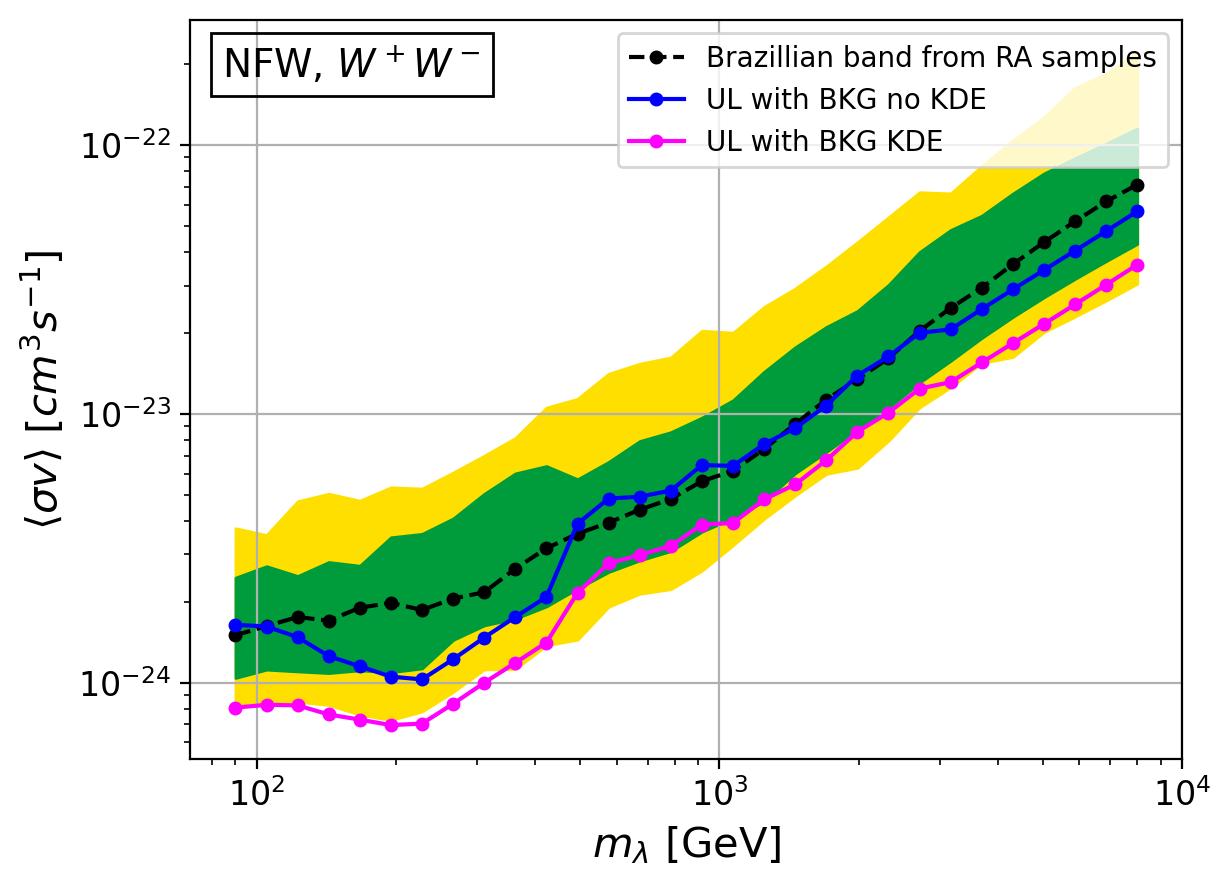

In [7]:
profile = 'NFW' # NFW, Burkert
process = 'ann' # ann, decay
for ch in ['WW']:
    path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and 'MC1122_BKGfulldata_nsample' in file[i] and 'fixgc1_testnullasRAscrambling.pkl' in file[i])]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    # limit =  UL['UL']
    limit =  UL['median']
    # limit =  UL['fraction']
    plt.fill_between(UL['mass'], UL['16'], UL['84'], alpha=1., color='#FFDF00')
    plt.fill_between(UL['mass'], UL['2.5'], UL['97.5'], alpha=1., color='#009C3B')
    plt.plot(UL['mass'], limit, marker='o',label='Brazillian band from RA samples', color='black', markersize=4, ls='--') 


    path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and '30points_MC1122_unblind_gcmodelNone_fixgc1_testBkgnokde.pkl' in file[i] )]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    limit =  UL['UL']
    plt.plot(UL['mass'], limit, marker='o',label='UL with BKG no KDE', markersize=4, color='blue') 

    path = [file[i] for i in range(len(file)) if (f"{process}_" + ch +"_"+ profile in file[i] and '30points_MC1122_unblind_gcmodelNone_fixgc1.pkl' in file[i] )]
    if len(path)==0: continue
    print(path[0])
    UL = pkl.load(open(filepath+path[0], "rb"))
    limit =  UL['UL']
    plt.plot(UL['mass'], limit, marker='o',label='UL with BKG KDE', markersize=4, color='magenta') 


plt.semilogy()
plt.semilogx()

# plt.ylim(1e-25, 1e-21)
# plt.ylim(1e22, 6e26)


# plt.legend(ncol=4, bbox_to_anchor=(-0.019, 1.1, 1.035, 0.101), loc='upper left', mode="expand", fontsize=13)
plt.legend()


if process=='ann':  plt.ylabel(r'$\langle \sigma v \rangle$'+r' $[cm^3 s^{-1}]$', fontsize=15)
if process=='decay': plt.ylabel(r'$\tau$'+r' $[s]$', fontsize=15)
# plt.ylabel(r'$\xi_{ann}$')
# plt.ylabel(r'$N_{signal}$')


plt.xlabel(r'$m_{\lambda}$'+' [GeV]', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.figtext(0.15,0.82, f'{profile}, {ch_title[ch]}', bbox=dict(facecolor='none', edgecolor='black'), fontsize=14)
plt.grid()

TS distribution

[]

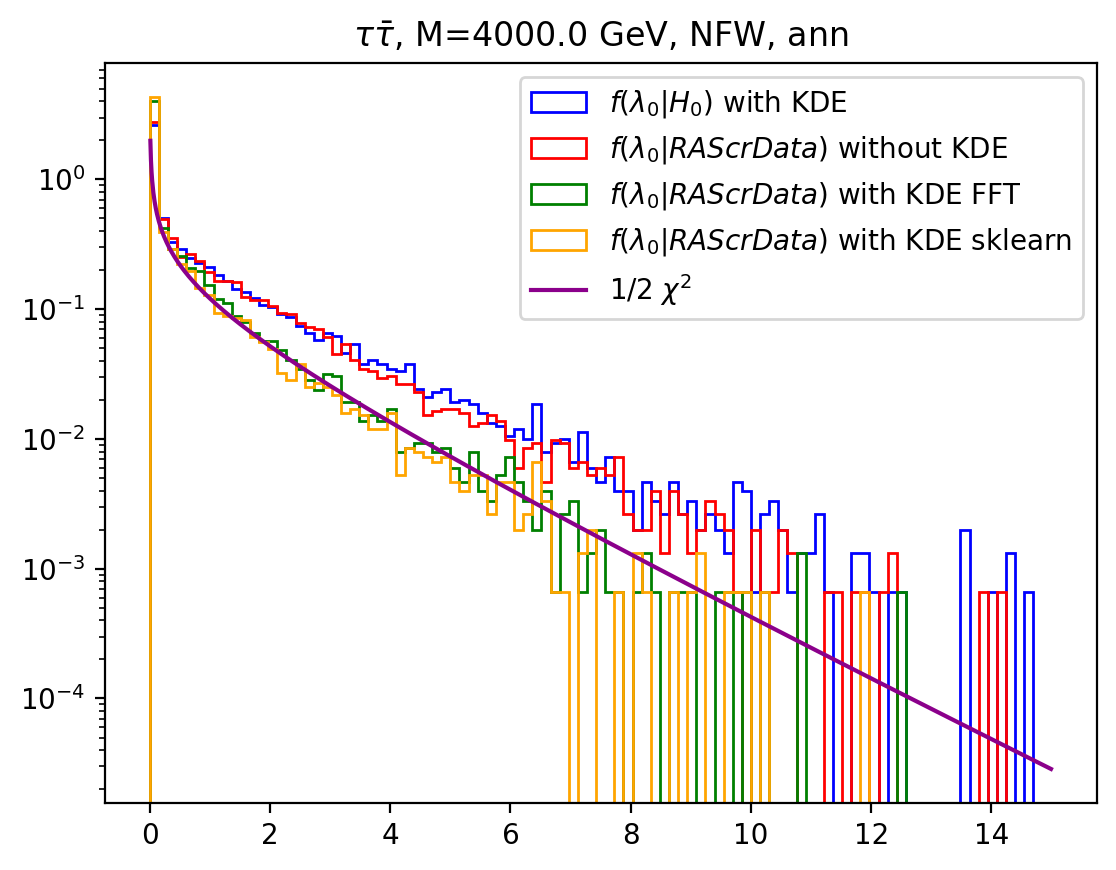

In [9]:
channel = 'tautau'
process = 'ann'
profile = 'NFW'
mass = 4000.0

x = np.arange(0, 15, 0.01)
binedges = np.linspace(0., 15, 100)


plt.title(f'{ch_title[channel]}, M={mass} GeV, {profile}, {process}')

TSdist = pkl.load(open(f'/data/user/tchau/DarkMatter_OscNext/TS_distribution/{channel}_{profile}_{process}_{mass}_bkg_FFT_sample_null_hypothesis.pkl', 'rb'))
TSdist_bkgnokde_RAscr =  pkl.load(open(f'/data/user/tchau/DarkMatter_OscNext/TS_distribution/{channel}_{profile}_{process}_{mass}_bkg_nokde_sample_RA_scramble.pkl', 'rb'))
# TSdist_bkgnokde_RAscr =  pkl.load(open(f'/data/user/tchau/DarkMatter_OscNext/TS_distribution/{channel}_{profile}_{process}_{mass}_bkg_nokde_sample_null_hypothesis.pkl', 'rb'))
TSdist_bkgkde_RAscr =  pkl.load(open(f'/data/user/tchau/DarkMatter_OscNext/TS_distribution/{channel}_{profile}_{process}_{mass}_bkg_FFT_sample_RA_scramble.pkl', 'rb'))
TSdist_bkgkdeSk_RAscr =  pkl.load(open(f'/data/user/tchau/DarkMatter_OscNext/TS_distribution/{channel}_{profile}_{process}_{mass}_bkg_sklearn_sample_RA_scramble.pkl', 'rb'))



plt.hist(TSdist, density=True, bins=binedges, histtype='step', color='blue', label=r'$f(\lambda_{0}|H_0)$ with KDE')
plt.hist(TSdist_bkgnokde_RAscr, density=True, bins=binedges, histtype='step', color='red', label=r'$f(\lambda_{0}|RAScrData)$ without KDE')
plt.hist(TSdist_bkgkde_RAscr, density=True, bins=binedges, histtype='step', color='green', label=r'$f(\lambda_{0}|RAScrData)$ with KDE FFT')
plt.hist(TSdist_bkgkdeSk_RAscr, density=True, bins=binedges, histtype='step', color='orange', label=r'$f(\lambda_{0}|RAScrData)$ with KDE sklearn')


from scipy.stats import chi2
plt.plot(x, 1/2*chi2.pdf(x, df=1), label=r"1/2 $\chi^2$", color='darkmagenta')

# data = DataHist(Bin, sample='data')
# ds.asimov(Ndata, data.flatten()/np.sum(data.flatten()))    
# lr = LikelihoodRatioTest(model = modelH1, null_model = modelH0)
# lr.models['H1'].parameters["dm_H1"].fixed=False
# lr.models['H0'].parameters["dm_H0"].fixed=True
# lr.models['H0'].parameters["dm_H0"].value=0.00042398862609938776
# lr.data = ds
# lr.fit('H1')
# lr.fit('H0')
# plt.axvline(x=np.median(TSdist0), ls='-.', color='blue', label = r'median $f(\lambda_{\xi_{UL}}|RAScrData)$' + f'={np.round(np.median(TSdist0), 2)}' )
# plt.axvline(x=lr.TS, ls='-.', color='magenta', label=r'$\lambda=2 log \frac{ L( \hat{\xi}_{obs}) }{L( \xi_{UL} )}$' + f' = {np.round(lr.TS, 2)}' )
plt.legend()
plt.semilogy()